# **Project: Breast Cancer Tumor Classification using K-Nearest Neighbors (KNN)**

---

## **Description:**

Breast cancer is the **most common cancer** among women globally, accounting for nearly **25% of all cancer cases**.  
In **2015 alone**, over **2.1 million** people were affected.  

The disease begins when cells in the breast **grow uncontrollably**, often forming tumors that can be:
- **Detected via X-rays**
- **Felt as lumps** in the breast area

One of the **main challenges** in breast cancer diagnosis is to **accurately classify** tumors as:
-  **Malignant** (cancerous)
-  **Benign** (non-cancerous)

---

## **Dataset:**

We will use the **Breast Cancer Wisconsin (Diagnostic) Dataset**, which contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

 **Source:** Kaggle / scikit-learn built-in datasets

---

## **Objectives:**

1.  **Understand** the dataset and perform **necessary cleaning & preprocessing**
2.  **Explore the data** using visualization techniques
3.  **Build classification models** to predict whether the tumor is **Malignant** or **Benign**
4.  Use **K-Nearest Neighbors (KNN)** as the **primary classification model**
5.  **Tune hyperparameters** using:
   - Grid Search
   - Randomized Search
6.  **Compare performance** across classification algorithms using the following metrics:
   - **Accuracy**
   - **Precision**
   - **Recall**
   - **F1 Score**
   - **ROC-AUC Score**

---

##  **Acknowledgements:**

This dataset is referred from **Kaggle** and also available via **`sklearn.datasets.load_breast_cancer()`**.


In [79]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df=pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [81]:
#Droping the unwanted columns
df=df.drop(columns='id')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploratory Data Analysis (EDA)<br>
M--->stand for malignint<br>
B--->stand for benign

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [83]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**UNDERSTAND THE TARGET**

In [84]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [85]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [86]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now you can see that label colum is encoded

<Axes: xlabel='diagnosis', ylabel='count'>

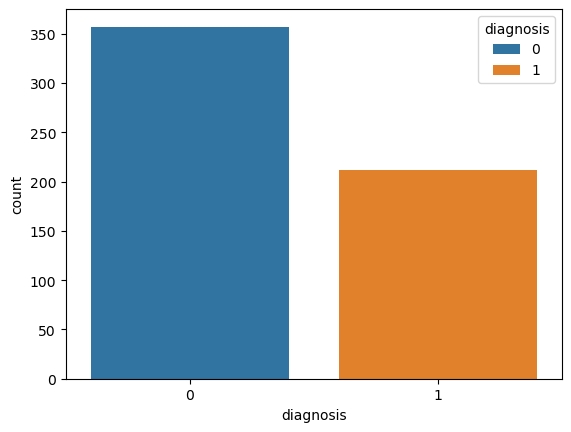

In [87]:
#counutplot
sns.countplot(x='diagnosis',data=df,hue='diagnosis')

**CIRRELATION-MATRIX**

In [88]:
# Correlation of features with target variable
correlation_with_Diagnosise = df.corr()['diagnosis'].sort_values(ascending=False)
correlation_with_Diagnosise

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

## FEATURE SCALING <br>

##  Why Scaling is Critical for KNN

- **KNN (K-Nearest Neighbors)** is a distance-based algorithm.
- It calculates the distance (usually **Euclidean distance**) between data points to make predictions.
- If features are not scaled, **features with larger ranges will dominate the distance calculation**, leading to poor results.

###  Problem Without Scaling
- A feature like `Age` (0–100) vs `Income` (0–100,000) — KNN will mostly rely on `Income` due to its large scale.
- This distorts the model's **true sense of proximity** between data points.

###  Why Scaling Solves This
- **Feature scaling** ensures **equal contribution** from all features in distance computation.
- It brings all features to the **same scale**, making KNN work as expected.

###  Common Feature Scaling Techniques

| Technique         | Description                                      | Use Case                          |
|------------------|--------------------------------------------------|-----------------------------------|
| `StandardScaler` | Scales features to have **zero mean** and **unit variance** | Best for normally distributed data |
| `MinMaxScaler`   | Scales features to a **0–1 range**               | Good when you need bounded output |
| `RobustScaler`   | Uses **median** and **IQR** to scale             | Ideal when dataset has **outliers** |

###  Summary
- Always scale your features before using **KNN**, especially when they vary in units or ranges.
- Otherwise, model predictions will be biased toward larger-scale features.

In [89]:
#befor doing the scaling first we need to make X and y
X=df.drop(columns='diagnosis',axis=1)
y=df['diagnosis']

In [90]:
#mow we need to deo train test split 
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [92]:
#now we are able to do scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [93]:
X_train

array([[ 0.02090193,  0.28562106,  0.01889271, ...,  0.28708398,
        -0.59963793, -0.32285831],
       [-0.53400124, -1.40599342, -0.51656117, ..., -0.50392051,
         0.88583908,  0.43518026],
       [-0.2551693 , -0.43868901, -0.3137073 , ..., -0.99299632,
        -0.22946024, -0.68461207],
       ...,
       [ 0.53715513,  0.08001046,  0.48846929, ...,  0.56225563,
        -0.41534346, -1.1291307 ],
       [ 1.28254744,  0.49590463,  1.24364806, ...,  1.36496632,
         1.21947563,  0.77994255],
       [-0.11437297, -0.1466285 , -0.12892951, ...,  0.20346828,
        -0.09918311,  0.32007679]])

## MODEL TRANING BY DEFAULT PARAMTER

In [94]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [95]:
#y_test predication
y_test_pred=model.predict(X_test)
y_test_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

**COMPARSION TABLE OF ACTUAL AND PREDICATED VALUE**

In [96]:
comparison_table = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': y_test_pred
})
comparison_table

,Actual,Predicted
107,0,0
437,0,0
195,0,0
141,1,1
319,0,0
...,...,...
19,0,0
313,0,0
139,0,0
495,0,0


## BY DEAFULT ,MODEL EVALUATION

In [97]:
#model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [98]:
accuracy=accuracy_score(y_test,y_test_pred)
accuracy

0.9649122807017544

In [99]:
confusion_matrix(y_test,y_test_pred)

array([[71,  1],
       [ 3, 39]], dtype=int64)

In [100]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## SELECTING BEST K VALUE

In [101]:
score=[]
for k in range(1,20):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)
    score.append(accuracy_score(y_test,y_test_pred))

**PLOT B/W SCORE AND K VALUE**

Text(0, 0.5, 'accuracy')

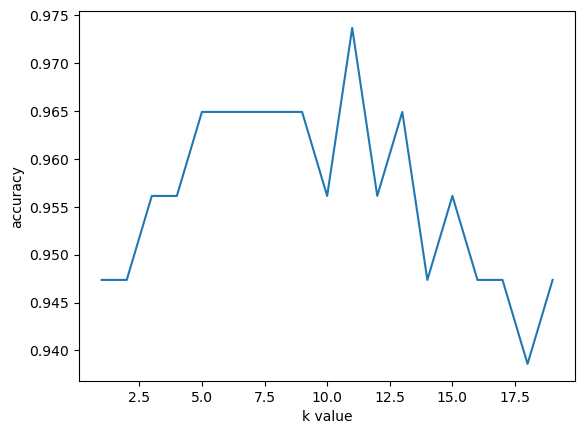

In [103]:
#now plot it
plt.plot(range(1,20),score)
plt.xlabel('k value')
plt.ylabel('accuracy')

we can see that model has high score at k=11

**NOW TRAIN MODEL ON K=11**

In [105]:
mode_k11=KNeighborsClassifier(n_neighbors=11)
mode_k11.fit(X_train,y_train)
y_test_pred=mode_k11.predict(X_test)

**MODEL EVALUATION**

In [106]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## ROC CURVE

##  What is a ROC Curve?

The **ROC Curve** (Receiver Operating Characteristic Curve) is a **graphical representation** of a classifier’s performance across **all classification thresholds**.

It plots:

- **True Positive Rate (TPR)** — also called **Recall** or **Sensitivity**
- **False Positive Rate (FPR)** — when you wrongly predict positive when it's actually negative

---

##  Intuition Behind It

Imagine your model predicts a probability like **0.8** of being class 1:

- If you choose a threshold of **0.5**, it becomes class 1.
- If you raise the threshold to **0.9**, fewer samples become class 1.
- This directly affects:
  - **TP** (True Positives)
  - **FP** (False Positives)
  - **TN** (True Negatives)
  - **FN** (False Negatives)

By plotting the ROC curve, you are **visualizing how performance changes** as you vary the threshold.

---

##  Ideal ROC Curve

- A **perfect classifier** will go **straight up** to (0, 1) and then **horizontally** to (1, 1).
- A **random classifier** gives a diagonal line from (0, 0) to (1, 1).
- The **closer the**


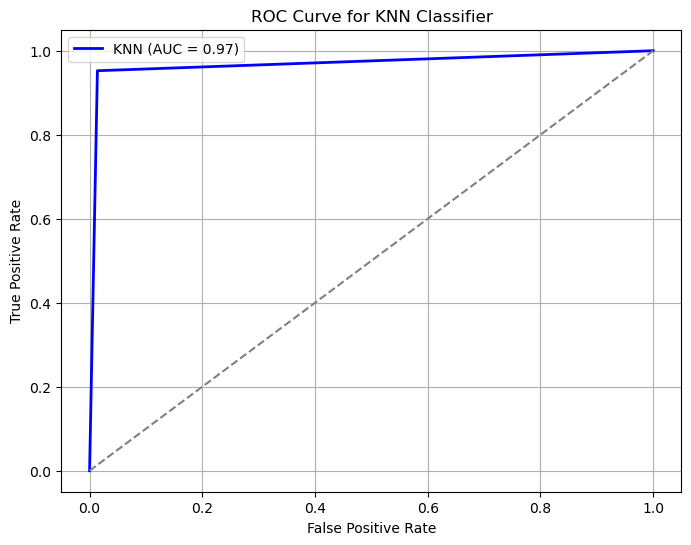

In [108]:
#now plot the roc curve
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN Classifier")
plt.legend()
plt.grid(True)
plt.show()

## GridSearchCV METHOD FOR FINDING BEST K VALUE

In [111]:
model_cv=KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
grid_param={'n_neighbors':np.arange(1,50)}

In [113]:
grid_model=GridSearchCV(model_cv, param_grid=grid_param,cv=10)
grid_model.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [114]:
y_test=grid_model.predict(X_test)

In [115]:
#best parameter
grid_model.best_params_

{'n_neighbors': 11}

In [118]:
accuracy_score(y_test,y_test_pred)

1.0

In [116]:
confusion_matrix(y_test,y_test_pred)

array([[73,  0],
       [ 0, 41]], dtype=int64)

## ROC CURVE

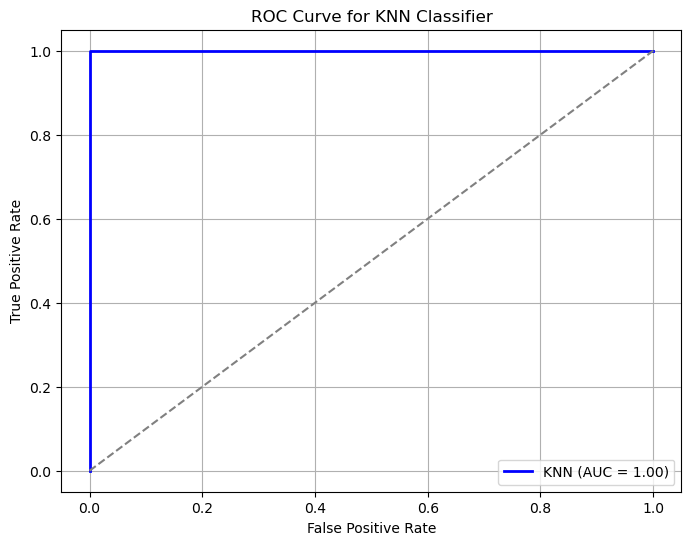

In [117]:
#now plot the roc curve
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN Classifier")
plt.legend()
plt.grid(True)
plt.show()

In [120]:
# Save both the model and scaler
import pickle
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(grid_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)